In [21]:
import json
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import sys
import pandas as pd
import pickle



%matplotlib inline

### Getting a network from review.json
#### Specify ON businesses only (Waterloo, Ontario, Canada)

First, retrieve business_id for all businesses in Ontario

In [2]:
df = pd.read_csv(open('./output/business.csv'))

ON_df = df.business_id[df['state'] == 'ON']
ON_businesses = ON_df.BusinessId.tolist()
print len(ON_businesses)


Second, parse review.json to get all users who reviewed businesses in Ontario

In [5]:
c = 0
user_dic = defaultdict(list)
business_dic = defaultdict(list)
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        bid =  review['business_id']
        if (bid in ON_businesses):
            uid = review['user_id']
            user_dic[uid].append(bid)
            business_dic[bid].append(uid)


        if c % 400000 == 0:
            print c
# print user_list
# print business_list

400000
800000
1200000
1600000
2000000


In [6]:
print 'The number of users who reviewed businesses in Ontario is ' + len(user_dic)
print 'The number of businesses in Ontario is ' + len(business_dic)

1804 474


Third, create a dictionary of all users and a list of friends for each which consists of every user who reviewed at least one business the user reviewed

In [7]:
friends_list = {}

for user in user_dic:
    for business in user_dic[user]:
        if user in friends_list.keys():
            friends_list[user].extend(business_dic[business])
        else:
            friends_list[user]=business_dic[business]
        

In [9]:
review_network = nx.Graph(friends_list)

92.3229999542


In [10]:
print "Number of nodes in the graph: ", review_network.number_of_nodes() 
print "Number of edges in the graph: ", review_network.number_of_edges() 

614887

Fourth, draw the network

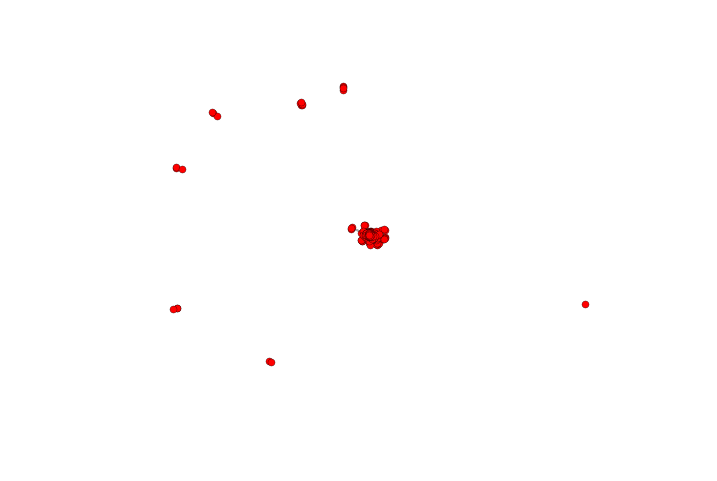

In [12]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(review_network, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

Remove outliers (nodes with a degree < 100)

In [15]:
degrees = review_network.degree()

In [18]:
c = 0
for node in degrees.keys():
    if degrees[node] < 100:
        review_network.remove_node(node)
        c+=1
print c

140


In [19]:
print "Number of nodes in the graph: ", review_network.number_of_nodes() 
print "Number of edges in the graph: ", review_network.number_of_edges() 

Number of nodes in the graph:  1664
Number of edges in the graph:  609393


Redraw the network graph

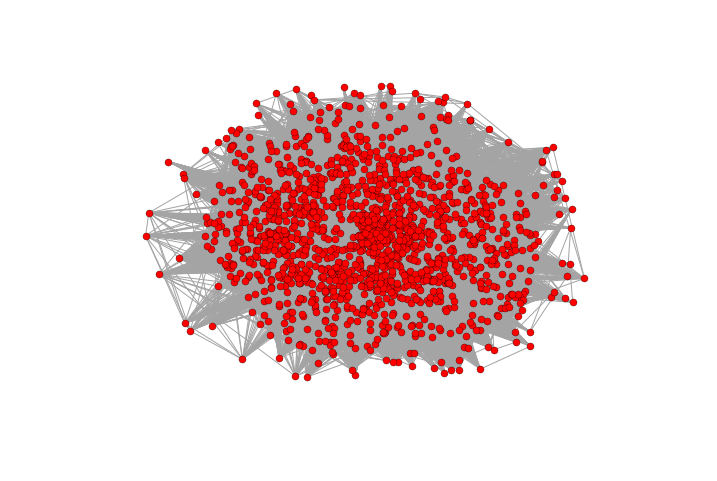

In [20]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(review_network, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

In [22]:
pickle.dump(review_network, open('ON_review_network.txt', 'w'))  #save our network graph to be retrieved later
